In [1]:
import easyvvuq as uq
import chaospy as cp
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Define campaign
campaign = uq.Campaign(name="campaign", work_dir="campaigns")

# Define parameter space
params = {
    "pthermmw": {"type": "float", "min": 0.0, "max": 1e6, "default": 2.2177e3},
    "etath": {"type": "float", "min": 0.0, "max": 1.0, "default": 4.1100e-1},
    "out_file": {"type": "string", "default": "out.csv"},
}

# Create encoder and decoder
encoder = uq.encoders.GenericEncoder(template_fname="water_use.template", delimiter="$", target_filename="in.toml")
decoder = uq.decoders.SimpleCSV(target_filename="out.csv", output_columns=["water_use_tower"])

cwd = str(Path.cwd().resolve())
cmd = f"python {cwd}/water_use.py in.toml"
actions = uq.actions.local_execute(encoder, cmd, decoder)

# Add the app
campaign.add_app(name="water_use", params=params, actions=actions)

# Create sampler
vary = {"pthermmw": cp.Uniform(1e2, 1e3), "etath": cp.Uniform(0.2, 0.45)}
sampler = uq.sampling.PCESampler(vary=vary, polynomial_order=3)

# Add sampler to campaign
campaign.set_sampler(sampler)

# Draw samples, execute and collate
campaign.execute().collate()
df = campaign.get_collation_result()

# Analysis
results = campaign.analyse(qoi_cols=["water_use_tower"])

inputs = {'pthermmw': 397.00853038681475, 'etath': 0.367497630448107}
Volume used in cooling tower (m3/day) self.waterusetower = 1.07e+04
Volume used in recirculating water system (m3/day) self.wateruserecirc = 3.58e+03
Volume used in once-through water system (m3/day) self.wateruseonethru = 3.51e+05
inputs = {'pthermmw': 702.9914696131852, 'etath': 0.282502369551893}
Volume used in cooling tower (m3/day) self.waterusetower = 2.14e+04
Volume used in recirculating water system (m3/day) self.wateruserecirc = 7.19e+03
Volume used in once-through water system (m3/day) self.wateruseonethru = 7.05e+05
inputs = {'pthermmw': 162.48865978267642, 'etath': 0.367497630448107}
Volume used in cooling tower (m3/day) self.waterusetower = 4.37e+03
Volume used in recirculating water system (m3/day) self.wateruserecirc = 1.47e+03
Volume used in once-through water system (m3/day) self.wateruseonethru = 1.44e+05
inputs = {'pthermmw': 702.9914696131852, 'etath': 0.43264203894925657}
Volume used in cooling t

In [3]:
# Inspect samples
df = results.samples
df

,run_id,iteration,pthermmw,etath,out_file,water_use_tower
,0,0,0,0,0,0
0,1,0,162.48866,0.217358,out.csv,5406.614324
1,2,0,162.48866,0.282502,out.csv,4956.586502
2,3,0,162.48866,0.367498,out.csv,4369.425869
3,4,0,162.48866,0.432642,out.csv,3919.398047
4,5,0,397.00853,0.217358,out.csv,13209.980377
5,6,0,397.00853,0.282502,out.csv,12110.427433
6,7,0,397.00853,0.367498,out.csv,10675.817902
7,8,0,397.00853,0.432642,out.csv,9576.264958
8,9,0,702.99147,0.217358,out.csv,23391.193912


/home/jon/code/notebooks/vvuq/.venv/lib/python3.10/site-packages/easyvvuq/analysis/results.py:417: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Text(0.5, 1.0, 'Sobol indices treemap: Decomposition of water_use_tower variance')

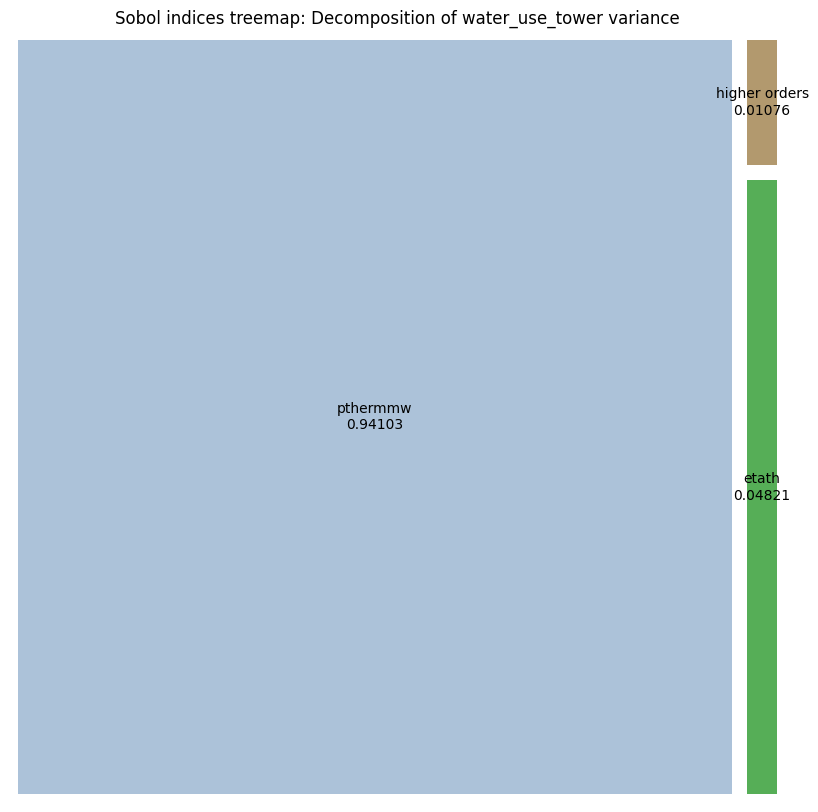

In [4]:
fig, ax = plt.subplots()
what = results.plot_sobols_treemap(qoi="water_use_tower", ax=ax)
default_title = ax.get_title()
ax.set_title(f"Sobol indices treemap: {default_title}")

Text(0.5, 1.0, 'Variability in water_use_tower with pthermmw')

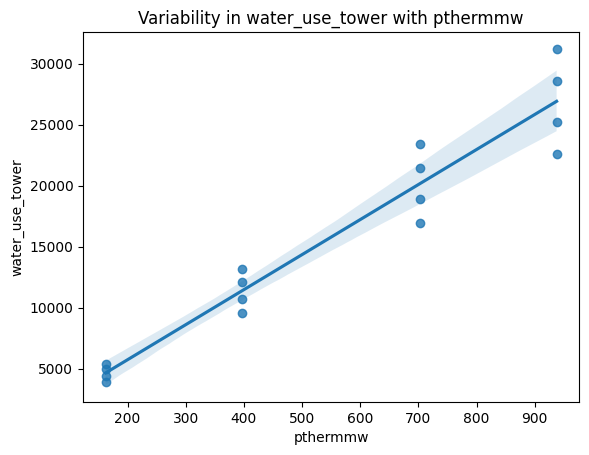

In [5]:
ax = sns.regplot(x=df["pthermmw"], y=df["water_use_tower"])
ax.set_xlabel("pthermmw")
ax.set_ylabel("water_use_tower")
ax.set_title("Variability in water_use_tower with pthermmw")

## Manual distributions

Text(0, 0.5, 'Cooling tower water use, m^3 per day')

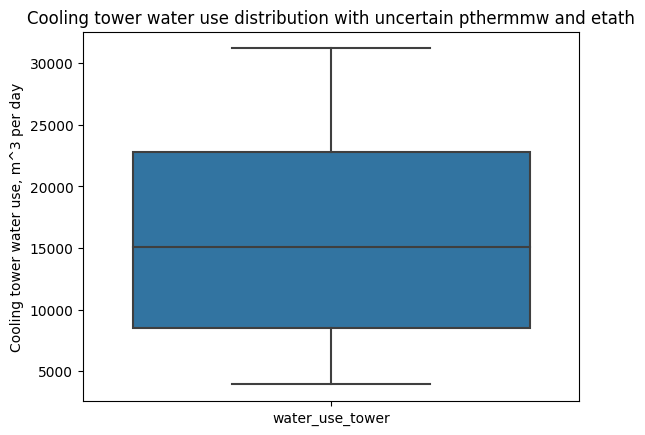

In [6]:
water_use_tower = results.samples["water_use_tower"]
ax = sns.boxplot(data=water_use_tower)
ax.set_title("Cooling tower water use distribution with uncertain pthermmw and etath")
ax.set_xticklabels(["water_use_tower"])
ax.set_ylabel("Cooling tower water use, m^3 per day")

<AxesSubplot: >

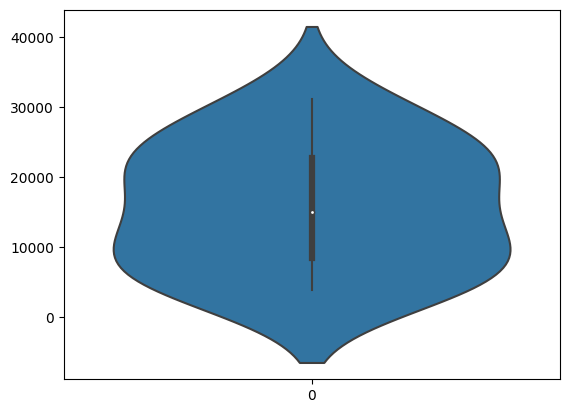

In [7]:
# Think this includes KDE fitting
sns.violinplot(data=water_use_tower)

## Kernel Density Estimate fitting

In [8]:
# Try to get distribution: don't understand this yet
cp_plot = results.get_distribution(qoi="water_use_tower")
cp_plot.pdf(df["pthermmw"])

array([[7.37577093e-07],
       [7.37577093e-07],
       [7.37577093e-07],
       [7.37577093e-07],
       [1.14644909e-06],
       [1.14644909e-06],
       [1.14644909e-06],
       [1.14644909e-06],
       [1.94719958e-06],
       [1.94719958e-06],
       [1.94719958e-06],
       [1.94719958e-06],
       [2.82346679e-06],
       [2.82346679e-06],
       [2.82346679e-06],
       [2.82346679e-06]])

Text(0.5, 0, 'water_use_tower, $m^3$')

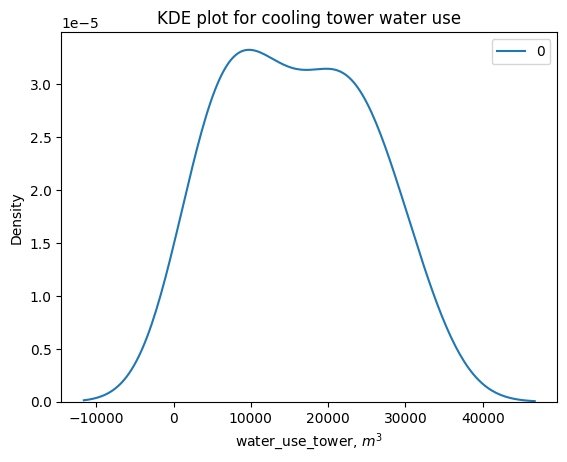

In [11]:
# What is a KDE plot?
ax = sns.kdeplot(water_use_tower)
ax.set_title("KDE plot for cooling tower water use")
ax.set_xlabel("water_use_tower, $m^3$")

# TODO Could plot the points on this (like easyvvuq fig. 5)